In [29]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer 


In [35]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df.loc[:, 'duration'] = df['dropOff_datetime'] -df['pickup_datetime']
    df.duration = df.duration.dt.total_seconds() / 60
    
    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
    
    categorical = ['PUlocationID','DOlocationID']
    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    
    return df

In [36]:
categorical = ['PUlocationID','DOlocationID']
df = read_dataframe("./data/fhv_tripdata_2021-01.parquet")
df.duration.mean()

16.2472533682457

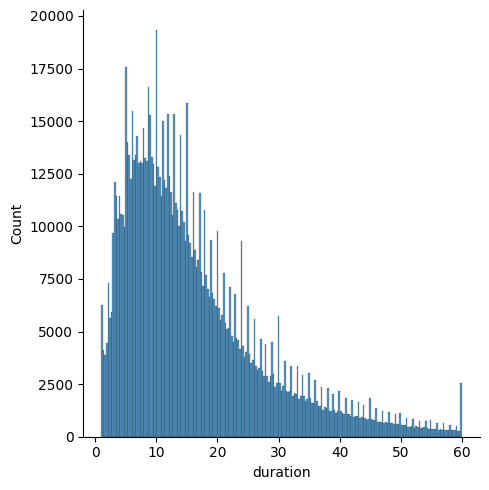

In [5]:
sns.displot(df.duration)

In [23]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1,-1,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1,-1,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1,72,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1,61,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1,71,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7,7,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44,91,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171,171,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15,15,None,B03285,19.433333


In [37]:
dv = DictVectorizer()
train_dicts = df[categorical].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

In [38]:
X_train.shape

(1109826, 525)

In [40]:
len(dv.feature_names_)

525